In [3]:
import numpy as np
import pandas as pd
from pyecharts import Geo,Style,Page,Bar,Boxplot,Pie,Grid
import matplotlib.pyplot as plt

# 一.上海2019年新房价格分析

### 1.导入数据

In [4]:
new_house=pd.read_csv('new_house.csv')
new_house.head()

,Unnamed: 0,0,1,2,3,4,5
0,0,3392,明城新村桂花园,奉贤,价格待定,住宅,未开盘
1,1,3393,天和尚海庭前,奉贤,50000,别墅,在售
2,2,3394,中核锦悦府,青浦,58000,住宅,在售
3,3,3395,乐活居,普陀,93000,住宅,在售
4,4,3396,中骏天珑,青浦,58000,住宅,在售


In [5]:
# 1.更改索引
new_house.columns=['id','rank','title','area','price','type','sale']
new_house=new_house.drop(['rank'],axis=1)
new_house=new_house.set_index('id')
new_house.head(10)

,title,area,price,type,sale
id,,,,,
0,明城新村桂花园,奉贤,价格待定,住宅,未开盘
1,天和尚海庭前,奉贤,50000,别墅,在售
2,中核锦悦府,青浦,58000,住宅,在售
3,乐活居,普陀,93000,住宅,在售
4,中骏天珑,青浦,58000,住宅,在售
5,新城虹口金茂府,虹口,102000,住宅,在售
6,保利玲玥公馆,奉贤,19500,住宅,在售
7,复地富顿街区,松江,42000,住宅,在售
8,复地富顿街区,松江,价格待定,别墅,未开盘


### 2.数据清洗

In [6]:
new_house.shape

(720, 5)

In [7]:
new_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 719
Data columns (total 5 columns):
title    720 non-null object
area     720 non-null object
price    720 non-null object
type     720 non-null object
sale     720 non-null object
dtypes: object(5)
memory usage: 33.8+ KB


In [8]:
# 1.price改为 float
new_house['price']=pd.to_numeric(new_house['price'],errors='coerce')

In [9]:
new_house['price'].describe()

count       605.000000
mean      49786.619835
std       32797.925820
min         150.000000
25%       30000.000000
50%       42694.000000
75%       61000.000000
max      190000.000000
Name: price, dtype: float64

In [10]:
# 上海房价不低于6000,去除异常值
new_house=new_house.drop(new_house[new_house['price']<6000].index)
new_house['price'].describe()

count       541.000000
mean      55509.927911
std       29880.196181
min        9739.000000
25%       35000.000000
50%       46000.000000
75%       67000.000000
max      190000.000000
Name: price, dtype: float64

In [11]:
# 检查空值
new_house.isnull().sum()

title      0
area       0
price    115
type       0
sale       0
dtype: int64

In [12]:
#根据 area 排序然后使用临近值补值
new_house['price']=new_house.sort_values('area')['price'].fillna(method='bfill')

In [13]:
new_house.isnull().sum()

title    0
area     0
price    0
type     0
sale     0
dtype: int64

In [14]:
new_house[new_house['price']<6000].count()

title    0
area     0
price    0
type     0
sale     0
dtype: int64

In [15]:
# 检查数据重复
new_house.duplicated().any()

True

In [16]:
new_house=new_house.drop_duplicates()
new_house.duplicated().any()

False

In [17]:
new_house.shape

(607, 5)

### 3.数据可视化

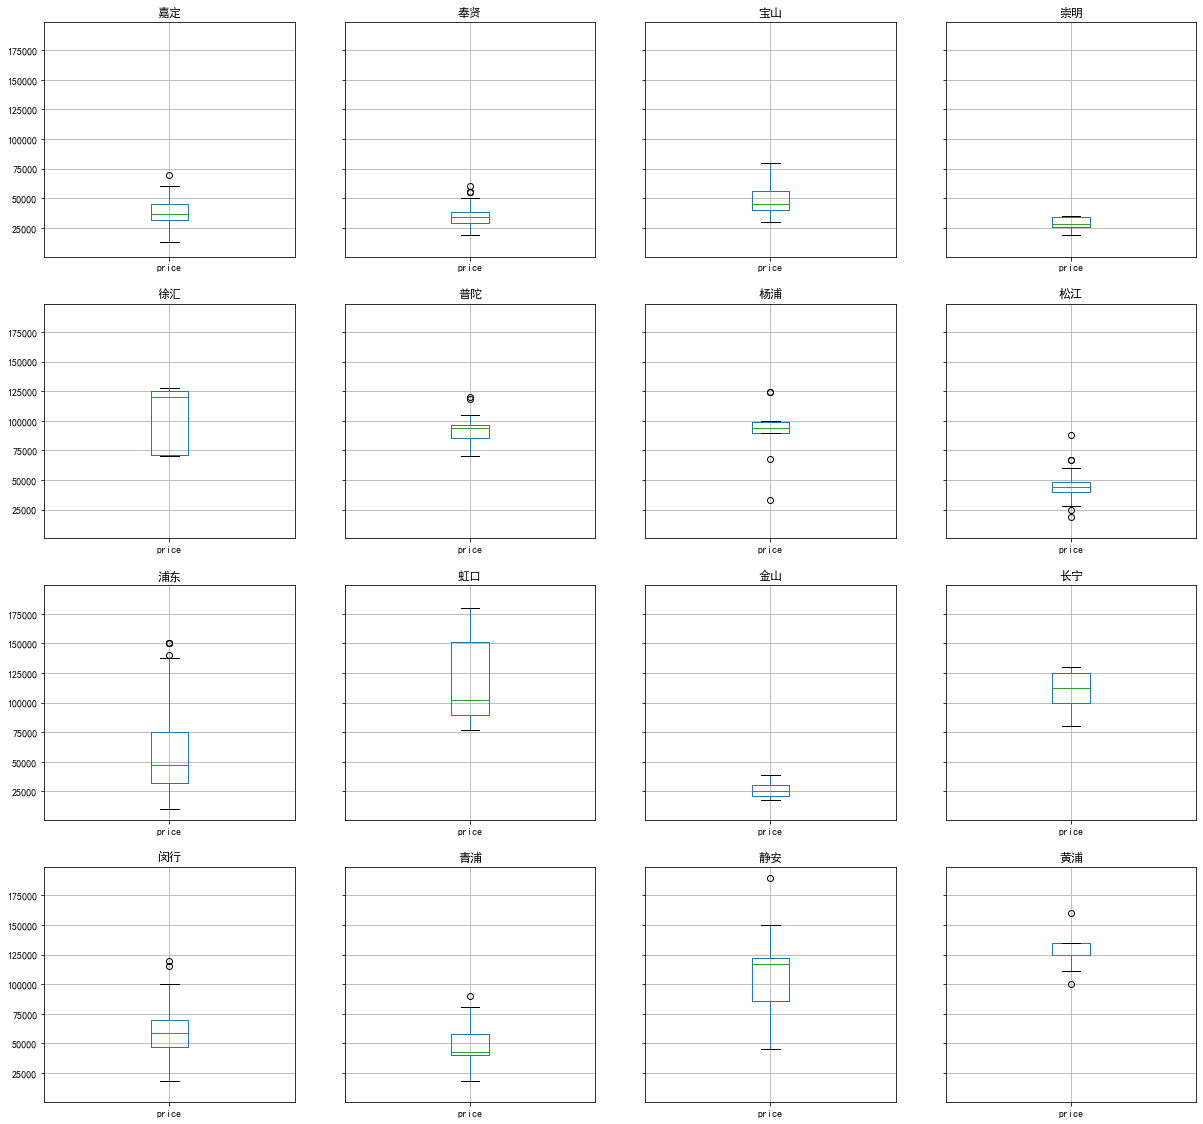

In [18]:
# 检查房价异常值
plt.rcParams['font.sans-serif']=['SimHei']
new_house.groupby('area').boxplot(figsize=(20,20))
plt.show()

#### 异常值较少,房价分布正常

In [19]:
# 通过行政区分析数量
page=Page()
style=Style(
    width=1200,
    height=600,
           )
chart=Pie('上海市2019年各行政区新房数量',title_pos='center',**style.init_style)
chart.add('数量',new_house['area'].value_counts().index,new_house['area'].value_counts(),radius=[30, 75], label_text_color=None,
          is_label_show=True, legend_orient='vertical', legend_pos='left') 
page.add(chart)
# page.render()

In [20]:
#通过行政区分析价格
page=Page()
style=Style(
    width=1200,
    height=600,
           )
chart=Bar('上海市2019年各行政区新房平均价格',**style.init_style)
chart.add('价格 元/m2',new_house.groupby('area').mean()['price'].index,
          np.round((new_house.groupby('area').mean()['price']),2),
          is_datazoom_show=True, 
          datazoom_type='both',
          datazoom_range=[0, 160]) 
page.add(chart)
# page.render()

In [21]:
# 分析各类型新房数量
page=Page()
style=Style(
    width=1000,
    height=800,
           )
chart = Pie("上海市2019年新房销销量情况", title_pos='center', **style.init_style)
chart.add("", new_house['sale'].value_counts().index, new_house['sale'].value_counts(), radius=[30, 75], label_text_color=None,
          is_label_show=True, legend_orient='vertical', legend_pos='left')
page.add(chart)
# page.render()

In [22]:
#分析各类型均价
page=Page()
style=Style(
    width=1000,
    height=600,
           )
chart=Bar('上海市2019年各类型新房均价',**style.init_style)
chart.add('价格 元/m2',new_house.groupby('type').mean()['price'].index,
          np.round((new_house.groupby('type').mean()['price']),2),) 
page.add(chart)
# page.render()

In [23]:
# fr1=pd.DataFrame(new_house.groupby('area')['type'].value_counts())
# fr1

In [24]:
#分析各类型均价
page=Page()
style=Style(
    width=1000,
    height=800,
           )
chart = Pie("上海市2019年各类型新房数量", title_pos='center', **style.init_style)
chart.add("", new_house.groupby('type')['price'].count().index,new_house.groupby('type')['price'].count(), radius=[30, 75], label_text_color=None,
          is_label_show=True, legend_orient='vertical', legend_pos='left')
page.add(chart)
# page.render()

In [25]:
#房价 9700-190100  分成20份,组距9020
#房价转为列表
new_home=new_house.copy()
p_p=new_home['price'].tolist()
#各区间信息
p_list=np.ceil([9700+k*(9020) for k in range(0,21)]).tolist()
#X为各个区间,Y为区间对应的数值
X=[]
for i in range(len(p_list)-1):
    X.append(str(p_list[i])+"-"+str(p_list[i+1]))
Y=[]
for i in range(len(p_list)-1):
    YY=[]
    for j in p_p:
        if j >p_list[i] and j <p_list[i+1]:
            YY.append(j)
    Y.append(len(YY))

In [26]:
X,Y

(['9700.0-18720.0',
  '18720.0-27740.0',
  '27740.0-36760.0',
  '36760.0-45780.0',
  '45780.0-54800.0',
  '54800.0-63820.0',
  '63820.0-72840.0',
  '72840.0-81860.0',
  '81860.0-90880.0',
  '90880.0-99900.0',
  '99900.0-108920.0',
  '108920.0-117940.0',
  '117940.0-126960.0',
  '126960.0-135980.0',
  '135980.0-145000.0',
  '145000.0-154020.0',
  '154020.0-163040.0',
  '163040.0-172060.0',
  '172060.0-181080.0',
  '181080.0-190100.0'],
 [9, 54, 121, 114, 68, 72, 35, 23, 23, 14, 16, 8, 30, 9, 2, 4, 1, 0, 3, 1])

In [27]:
page = Page()
style = Style(
    width=1300, height=800
)
attr = X
v1 =Y
chart = Pie("2019年上海新房房价饼图", title_pos='center', **style.init_style)
chart.add("", attr, v1, radius=[30, 75], label_text_color=None,
          is_label_show=True, legend_orient='vertical', legend_pos='left')
page.add(chart)

In [66]:
page=Page()
style=Style(
    title_color='#fff',
    title_pos='center',
    width=800,
    height=600,
    background_color='#404a59'
           )
data=[
      ('静安区',new_home[new_home['area']=='静安'].mean().values[0]),
      ('徐汇区',new_home[new_home['area']=='徐汇'].mean().values[0]),
      ('黄浦区',new_home[new_home['area']=='黄浦'].mean().values[0]),
      ('长宁区',new_home[new_home['area']=='长宁'].mean().values[0]),
      ('浦东新区',new_home[new_home['area']=='浦东'].mean().values[0]),
      ('宝山区',new_home[new_home['area']=='宝山'].mean().values[0]),
      ('虹口区',new_home[new_home['area']=='虹口'].mean().values[0]),
      ('杨浦区',new_home[new_home['area']=='杨浦'].mean().values[0]),
      ('闵行区',new_home[new_home['area']=='闵行'].mean().values[0]),
      ('嘉定区',new_home[new_home['area']=='嘉定'].mean().values[0]),
      ('松江区',new_home[new_home['area']=='松江'].mean().values[0]),
      ('青浦区',new_home[new_home['area']=='青浦'].mean().values[0]),
      ('奉贤区',new_home[new_home['area']=='奉贤'].mean().values[0]),
      ('金山区',new_home[new_home['area']=='金山'].mean().values[0]),
      ('崇明县',new_home[new_home['area']=='崇明'].mean().values[0])
     ]
chart=Geo('上海市2019新房房价温度图',**style.init_style)
attr,value=chart.cast(data)
chart.add('气泡图',attr,value,maptype='上海',is_visualmap=True,visual_range=[26326,126000],
          type = 'heatmap',
          is_legend_show=False,
          tooltip_formatter='{b}',
          label_emphasis_textsize=15,
          label_emphasis_pos='right')     
page.add(chart)

### 4.结论
#### 1.浦东新区2019年新房数量最多
#### 2.虹口,黄浦,徐汇,静安,长安房价领先于其他行政区,崇明和金山房价最低
#### 3.房价处于27000-45000元/平方米的新房最多
#### 4.2019年商品房数量领先
#### 5.2019年12月新房在售63.1%,售罄29.65%

# 二.上海市2019年二手房房价分析

### 1.导入数据

In [29]:
house=pd.read_csv('second_hand_house.csv')
house.head()

,Unnamed: 0,0,1,2,3,4
0,0,931,金唐公寓 2室1厅 335万,浦东,单价38493元/平米,335.0
1,1,932,永泰花苑 2室1厅 388万,浦东,单价53115元/平米,388.0
2,2,933,婚房装修的两房 近18号线沈梅路站一公里 看房方便,浦东,单价37199元/平米,265.0
3,3,934,内环内满五年唯一婚房装修正气一室一厅,浦东,单价53341元/平米,198.0
4,4,935,小区临河位置 精装修 诚心出售 方便看,浦东,单价37126元/平米,280.0


In [30]:
# 1.更改索引
house.columns=['id','rank','title','area','price','totalprice']
house=house.drop(['rank'],axis=1)
house=house.set_index('id')
house.head(10)

,title,area,price,totalprice
id,,,,
0,金唐公寓 2室1厅 335万,浦东,单价38493元/平米,335.0
1,永泰花苑 2室1厅 388万,浦东,单价53115元/平米,388.0
2,婚房装修的两房 近18号线沈梅路站一公里 看房方便,浦东,单价37199元/平米,265.0
3,内环内满五年唯一婚房装修正气一室一厅,浦东,单价53341元/平米,198.0
4,小区临河位置 精装修 诚心出售 方便看,浦东,单价37126元/平米,280.0
5,精装修，高品质居住。适宜居家育孩,浦东,单价70724元/平米,380.0
6,康桥宝邸精装两房中间楼层满五唯一无个税,浦东,单价37814元/平米,285.0
7,6号楼中高区，全明户型，朝南房型，有钥匙随时看,浦东,单价87007元/平米,1279.0
8,近地铁，中间楼层，南北通格局，业主诚心出售！,浦东,单价25070元/平米,235.0


In [31]:
# 处理单价
data=house['price'].tolist()
data1=[]
for i in data:
    data1.append(i[2:-4])

In [32]:
house['prices']=data1

In [33]:
house=house.drop('price',axis=1)
house.head()

,title,area,totalprice,prices
id,,,,
0,金唐公寓 2室1厅 335万,浦东,335.0,38493
1,永泰花苑 2室1厅 388万,浦东,388.0,53115
2,婚房装修的两房 近18号线沈梅路站一公里 看房方便,浦东,265.0,37199
3,内环内满五年唯一婚房装修正气一室一厅,浦东,198.0,53341
4,小区临河位置 精装修 诚心出售 方便看,浦东,280.0,37126


### 2.数据清洗

In [34]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38480 entries, 0 to 38479
Data columns (total 4 columns):
title         38480 non-null object
area          38480 non-null object
totalprice    38480 non-null float64
prices        38480 non-null object
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [35]:
# prices 改为数字类型
house['prices']=pd.to_numeric(house['prices'],errors='coerce')
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38480 entries, 0 to 38479
Data columns (total 4 columns):
title         38480 non-null object
area          38480 non-null object
totalprice    38480 non-null float64
prices        38480 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.5+ MB


In [36]:
house.describe()

,totalprice,prices
count,38480.000000,38480.000000
mean,560.556931,56418.062864
std,665.178521,25312.837761
min,50.000000,9782.000000
25%,255.000000,38607.000000
50%,370.000000,52801.000000
75%,645.000000,69542.250000
max,30000.000000,350767.000000


In [37]:
# 检查空值
house.isnull().sum()

title         0
area          0
totalprice    0
prices        0
dtype: int64

In [38]:
# 检查数据重复
house.duplicated().any()

True

In [39]:
house=house.drop_duplicates()
house.duplicated().any()

False

In [40]:
house.shape

(37061, 4)

### 3.数据可视化

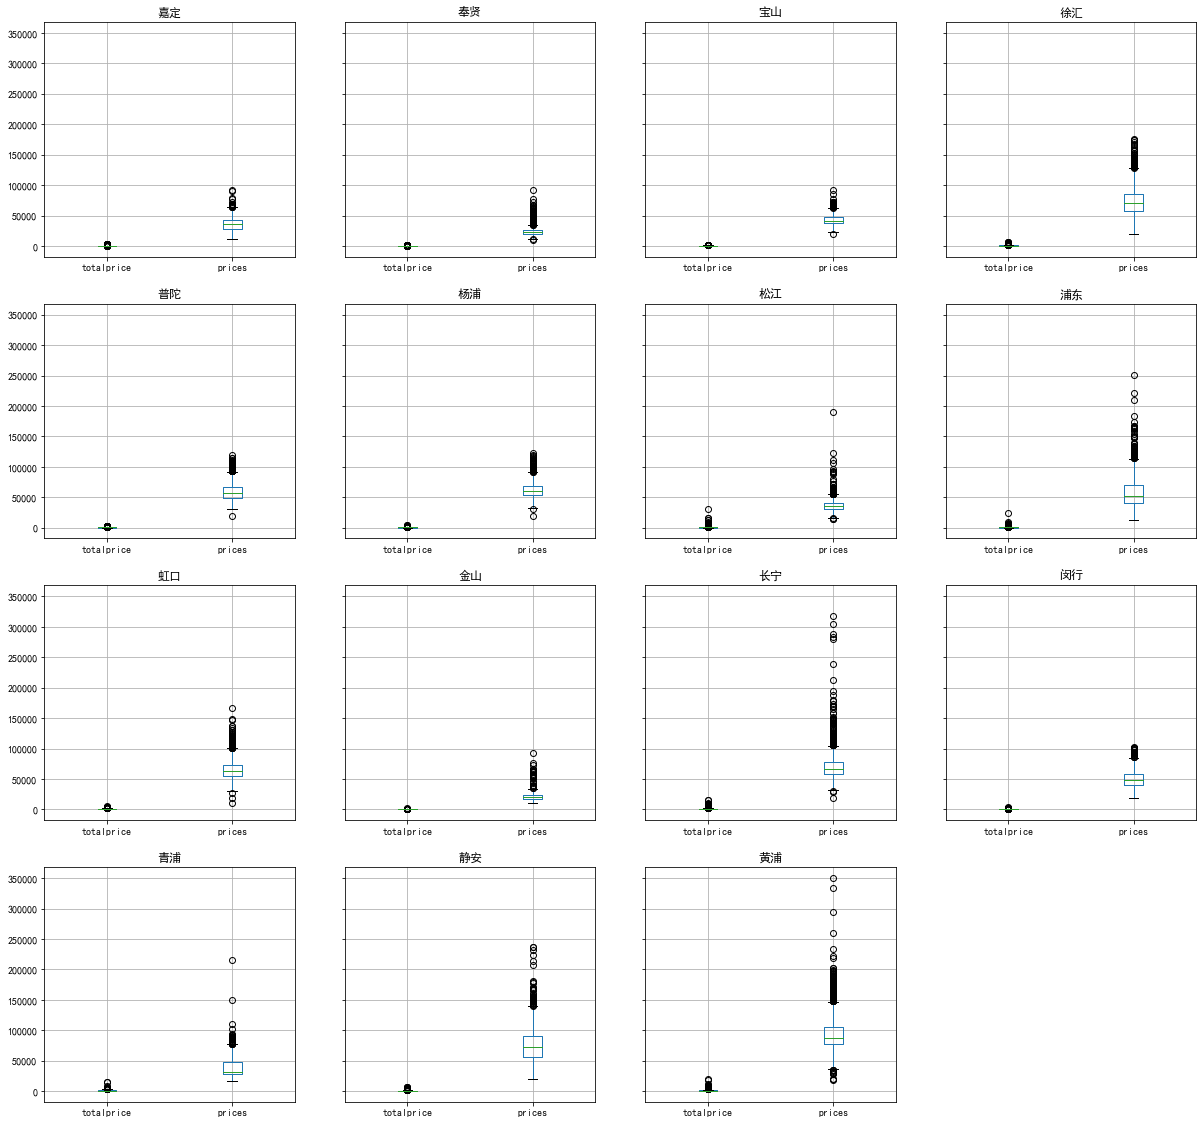

In [41]:
# 房价箱图
plt.rcParams['font.sans-serif']=['SimHei']
house.groupby('area').boxplot(figsize=(20,20))
plt.show()

#### 异常值集中在较大值一侧，分布呈左偏态.特别严重.

注:该数据来源链家官网,但由于网站原因,无法爬取所有的二手房信息,此处房源数量参考链家官网统计

In [42]:
# 通过行政区分析数量
page=Page()
style=Style(
    width=1200,
    height=600,
           )
attr=['普陀', '松江', '长宁', '徐汇', '宝山', '静安', '嘉定', '浦东', '闵行', '虹口', '黄浦', '杨浦', '奉贤', '青浦', '金山','崇明']
v=[4449,4390,3436,4573,4442,4407,3262,15045,7929,2336,2141,4513,1782,1740,672,0]
chart=Pie('上海市2019年各行政区二手房数量',title_pos='center',**style.init_style)
chart.add('数量',attr,v,radius=[30, 75], label_text_color=None,
          is_label_show=True, legend_orient='vertical', legend_pos='left') 
page.add(chart)
# page.render()

In [43]:
#通过行政区分析价格
page=Page()
style=Style(
    width=1200,
    height=600,
           )
chart=Bar('上海市2019年各行政区二手房平均价格',**style.init_style)
chart.add('价格 元/m2',house.groupby('area').mean()['prices'].index,
          np.round((house.groupby('area').mean()['prices']),2),
          is_datazoom_show=True, 
          datazoom_type='both',
          datazoom_range=[0, 160]) 
page.add(chart)
# page.render()

In [44]:
#通过行政区分析价格
page=Page()
style=Style(
    width=1200,
    height=600,
           )
chart=Bar('上海市2019年各行政区二手房总价平均',**style.init_style)
chart.add('价格 元/m2',house.groupby('area').mean()['totalprice'].index,
          np.round((house.groupby('area').mean()['totalprice']),2),
          is_datazoom_show=True, 
          datazoom_type='both',
          datazoom_range=[0, 160]) 
page.add(chart)
# page.render()

In [45]:
#房价 9700-351000  分成30份,组距11377
#房价转为列表
home=house.copy()
p_p=home['prices'].tolist()
#各区间信息
p_list=np.ceil([9700+k*(11377) for k in range(0,31)]).tolist()
#X为各个区间,Y为区间对应的数值
X=[]
for i in range(len(p_list)-1):
    X.append(str(p_list[i])+"-"+str(p_list[i+1]))
Y=[]
for i in range(len(p_list)-1):
    YY=[]
    for j in p_p:
        if j >p_list[i] and j <p_list[i+1]:
            YY.append(j)
    Y.append(len(YY))
page = Page()
style = Style(
    width=1300, height=800
)
attr = X
v1 =Y
chart = Pie("2019年上海二手房房价饼图", title_pos='center', **style.init_style)
chart.add("", attr, v1, radius=[30, 75], label_text_color=None,
          is_label_show=True, legend_orient='vertical', legend_pos='left')
page.add(chart)

In [64]:
page=Page()
style=Style(
    title_color='#fff',
    title_pos='center',
    width=800,
    height=600,
    background_color='#404a59'
           )
data=[
      ('静安区',home[home['area']=='静安'].mean().values[1]),
      ('徐汇区',home[home['area']=='徐汇'].mean().values[1]),
      ('黄浦区',home[home['area']=='黄浦'].mean().values[1]),
      ('长宁区',home[home['area']=='长宁'].mean().values[1]),
      ('浦东新区',home[home['area']=='浦东'].mean().values[1]),
      ('宝山区',home[home['area']=='宝山'].mean().values[1]),
      ('虹口区',home[home['area']=='虹口'].mean().values[1]),
      ('杨浦区',home[home['area']=='杨浦'].mean().values[1]),
      ('闵行区',home[home['area']=='闵行'].mean().values[1]),
      ('嘉定区',home[home['area']=='嘉定'].mean().values[1]),
      ('松江区',home[home['area']=='松江'].mean().values[1]),
      ('青浦区',home[home['area']=='青浦'].mean().values[1]),
      ('奉贤区',home[home['area']=='奉贤'].mean().values[1]),
      ('金山区',home[home['area']=='金山'].mean().values[1])
     ]
chart=Geo('上海市2019二手房房价温度图',**style.init_style)
attr,value=chart.cast(data)
chart.add('气泡图',attr,value,visual_range=[21717,95367],
          maptype='上海',is_visualmap=True,
          type = 'heatmap',
          is_legend_show=False,
          tooltip_formatter='{b}',
          label_emphasis_textsize=15,
          label_emphasis_pos='right')     
page.add(chart)

### 4.结论
#### 1.大部分二手房价处于21077到77962元/m2之间,其中43831-55208最多
#### 2.浦东二手房数量遥遥领先,其次是闵行,而崇明未找到二手房数据
#### 3.黄浦,静安,徐汇房价最高,奉贤,金山最低

# 三.新房与二手房房价对比

In [45]:
new_home.head()

,title,area,price,type,sale
id,,,,,
0,明城新村桂花园,奉贤,29900.0,住宅,未开盘
1,天和尚海庭前,奉贤,50000.0,别墅,在售
2,中核锦悦府,青浦,58000.0,住宅,在售
3,乐活居,普陀,93000.0,住宅,在售
4,中骏天珑,青浦,58000.0,住宅,在售


In [46]:
home.head()

,title,area,totalprice,prices
id,,,,
0,金唐公寓 2室1厅 335万,浦东,335.0,38493
1,永泰花苑 2室1厅 388万,浦东,388.0,53115
2,婚房装修的两房 近18号线沈梅路站一公里 看房方便,浦东,265.0,37199
3,内环内满五年唯一婚房装修正气一室一厅,浦东,198.0,53341
4,小区临河位置 精装修 诚心出售 方便看,浦东,280.0,37126


In [47]:
#通过行政区分析价格

#二手房
df1=pd.DataFrame(house.groupby('area').mean()['prices'])
df1.loc['崇明',:]=0.0
df1=df1.sort_index()
#新房
df2=pd.DataFrame(new_house.groupby('area').mean()['price'])
df2.sort_index()

page=Page()
style=Style(
    width=1200,
    height=600,
           )
chart=Bar('上海市2019年各行政区二手房与新房价格对比',**style.init_style)
chart.add('二手房',df1.index,
          df1.values.reshape(1,16).tolist()[0],mark_point=["average"],mark_line=["min", "max"], is_more_utils=True,
          is_datazoom_show=True, 
          datazoom_type='both',
          datazoom_range=[0, 160]) 
chart.add('新房',df2.index,
          df2.values.reshape(1,16).tolist()[0],mark_line=["min", "max"], is_more_utils=True,mark_point=["average"],
          is_datazoom_show=True, 
          datazoom_type='both',
          datazoom_range=[0, 160])
page.add(chart)
# page.render()

# 四.总结
### 1.浦东新区2019年新房,二手房数量遥遥领先,上海新房房源中以商品房为主导
### 2.房价处于27000-45000元/m2的新房数量最多,房价处于21077-77962元/m2的二手房数量最多
### 3.黄浦,徐汇,静安新房二手房价格均领先于其他行政区,虹口,长宁新房价格也较高
### 4.崇明和金山新房房价最低,金山和奉贤二手房价最低,崇明目前无在售的二手房源
### 5.所有地区新房价格均大于二手房,虹口差距最为明显

# 导出echarts 页面

In [73]:
#新房图表
def create_charts(data):
    # 通过行政区分析数量
    page=Page()
    
    style=Style(
        width=1200,
        height=600,
               ) 
    chart=Pie('上海市2019年各行政区新房数量',title_pos='center',**style.init_style)
    chart.add('数量',new_house['area'].value_counts().index,new_house['area'].value_counts(),radius=[30, 75], label_text_color=None,
              is_label_show=True, legend_orient='vertical', legend_pos='left') 
    page.add(chart)
    #通过行政区分析价格
    chart=Bar('上海市2019年各行政区新房平均价格',**style.init_style)
    chart.add('价格 元/m2',new_house.groupby('area').mean()['price'].index,
              np.round((new_house.groupby('area').mean()['price']),2),
              is_datazoom_show=True, 
              datazoom_type='both',
              datazoom_range=[0, 160]) 
    page.add(chart)
    # 分析各类型新房数量
    chart = Pie("上海市2019年新房销销量情况", title_pos='center', **style.init_style)
    chart.add("", new_house['sale'].value_counts().index, new_house['sale'].value_counts(), radius=[30, 75], label_text_color=None,
              is_label_show=True, legend_orient='vertical', legend_pos='left')
    page.add(chart)
    #分析各类型均价
    chart=Bar('上海市2019年各类型新房均价',**style.init_style)
    chart.add('价格 元/m2',new_house.groupby('type').mean()['price'].index,
              np.round((new_house.groupby('type').mean()['price']),2),) 
    page.add(chart)
    #分析各类型均价
    chart = Pie("上海市2019年各类型新房数量", title_pos='center', **style.init_style)
    chart.add("", new_house.groupby('type')['price'].count().index,new_house.groupby('type')['price'].count(), radius=[30, 75], label_text_color=None,
              is_label_show=True, legend_orient='vertical', legend_pos='left')
    page.add(chart)
    new_home=new_house.copy()
    p_p=new_home['price'].tolist()
    #各区间信息
    p_list=np.ceil([9700+k*(9020) for k in range(0,21)]).tolist()
    #X为各个区间,Y为区间对应的数值
    X=[]
    for i in range(len(p_list)-1):
        X.append(str(p_list[i])+"-"+str(p_list[i+1]))
    Y=[]
    for i in range(len(p_list)-1):
        YY=[]
        for j in p_p:
            if j >p_list[i] and j <p_list[i+1]:
                YY.append(j)
        Y.append(len(YY))

    style = Style(
        width=1300, height=800
    )
    attr = X
    v1 =Y
    chart = Pie("2019年上海新房房价饼图", title_pos='center', **style.init_style)
    chart.add("", attr, v1, radius=[30, 75], label_text_color=None,
              is_label_show=True, legend_orient='vertical', legend_pos='left')
    page.add(chart)

    style=Style(
        title_color='#fff',
        title_pos='center',
        width=1200,
        height=600,
        background_color='#404a59'
               )
    data=[
          ('静安区',new_home[new_home['area']=='静安'].mean().values[0]),
          ('徐汇区',new_home[new_home['area']=='徐汇'].mean().values[0]),
          ('黄浦区',new_home[new_home['area']=='黄浦'].mean().values[0]),
          ('长宁区',new_home[new_home['area']=='长宁'].mean().values[0]),
          ('浦东新区',new_home[new_home['area']=='浦东'].mean().values[0]),
          ('宝山区',new_home[new_home['area']=='宝山'].mean().values[0]),
          ('虹口区',new_home[new_home['area']=='虹口'].mean().values[0]),
          ('杨浦区',new_home[new_home['area']=='杨浦'].mean().values[0]),
          ('闵行区',new_home[new_home['area']=='闵行'].mean().values[0]),
          ('嘉定区',new_home[new_home['area']=='嘉定'].mean().values[0]),
          ('松江区',new_home[new_home['area']=='松江'].mean().values[0]),
          ('青浦区',new_home[new_home['area']=='青浦'].mean().values[0]),
          ('奉贤区',new_home[new_home['area']=='奉贤'].mean().values[0]),
          ('金山区',new_home[new_home['area']=='金山'].mean().values[0]),
          ('崇明县',new_home[new_home['area']=='崇明'].mean().values[0])
         ]
    chart=Geo('上海市2019新房房价温度图',**style.init_style)
    attr,value=chart.cast(data)
    chart.add('气泡图',attr,value,maptype='上海',is_visualmap=True,visual_range=[26326,126000],
              type = 'heatmap',
              is_legend_show=False,
              tooltip_formatter='{b}',
              label_emphasis_textsize=15,
              label_emphasis_pos='right')     
    page.add(chart) 
    return page
create_charts(new_house).render('new_home.html')

In [74]:
def create_chart(data):
    # 通过行政区分析数量
    page=Page()
    style=Style(
        width=1200,
        height=600,
               )
    attr=['普陀', '松江', '长宁', '徐汇', '宝山', '静安', '嘉定', '浦东', '闵行', '虹口', '黄浦', '杨浦', '奉贤', '青浦', '金山','崇明']
    v=[4449,4390,3436,4573,4442,4407,3262,15045,7929,2336,2141,4513,1782,1740,672,0]
    chart=Pie('上海市2019年各行政区二手房数量',title_pos='center',**style.init_style)
    chart.add('数量',attr,v,radius=[30, 75], label_text_color=None,
              is_label_show=True, legend_orient='vertical', legend_pos='left') 
    page.add(chart)


    #通过行政区分析价格
    chart=Bar('上海市2019年各行政区二手房平均价格',**style.init_style)
    chart.add('价格 元/m2',house.groupby('area').mean()['prices'].index,
              np.round((house.groupby('area').mean()['prices']),2),
              is_datazoom_show=True, 
              datazoom_type='both',
              datazoom_range=[0, 160]) 
    page.add(chart)


    #通过行政区分析价格

    chart=Bar('上海市2019年各行政区二手房总价平均',**style.init_style)
    chart.add('价格 元/m2',house.groupby('area').mean()['totalprice'].index,
              np.round((house.groupby('area').mean()['totalprice']),2),
              is_datazoom_show=True, 
              datazoom_type='both',
              datazoom_range=[0, 160]) 
    page.add(chart)

    #房价 9700-351000  分成30份,组距11377
    #房价转为列表
    home=house.copy()
    p_p=home['prices'].tolist()
    #各区间信息
    p_list=np.ceil([9700+k*(11377) for k in range(0,31)]).tolist()
    #X为各个区间,Y为区间对应的数值
    X=[]
    for i in range(len(p_list)-1):
        X.append(str(p_list[i])+"-"+str(p_list[i+1]))
    Y=[]
    for i in range(len(p_list)-1):
        YY=[]
        for j in p_p:
            if j >p_list[i] and j <p_list[i+1]:
                YY.append(j)
        Y.append(len(YY))
    attr = X
    v1 =Y
    chart = Pie("2019年上海二手房房价饼图", title_pos='center', **style.init_style)
    chart.add("", attr, v1, radius=[30, 75], label_text_color=None,
              is_label_show=True, legend_orient='vertical', legend_pos='left')
    page.add(chart)

    style=Style(
    title_color='#fff',
    title_pos='center',
    width=1200,
    height=600,
    background_color='#404a59'
           )
    data=[
          ('静安区',home[home['area']=='静安'].mean().values[1]),
          ('徐汇区',home[home['area']=='徐汇'].mean().values[1]),
          ('黄浦区',home[home['area']=='黄浦'].mean().values[1]),
          ('长宁区',home[home['area']=='长宁'].mean().values[1]),
          ('浦东新区',home[home['area']=='浦东'].mean().values[1]),
          ('宝山区',home[home['area']=='宝山'].mean().values[1]),
          ('虹口区',home[home['area']=='虹口'].mean().values[1]),
          ('杨浦区',home[home['area']=='杨浦'].mean().values[1]),
          ('闵行区',home[home['area']=='闵行'].mean().values[1]),
          ('嘉定区',home[home['area']=='嘉定'].mean().values[1]),
          ('松江区',home[home['area']=='松江'].mean().values[1]),
          ('青浦区',home[home['area']=='青浦'].mean().values[1]),
          ('奉贤区',home[home['area']=='奉贤'].mean().values[1]),
          ('金山区',home[home['area']=='金山'].mean().values[1])
         ]
    chart=Geo('上海市2019二手房房价温度图',**style.init_style)
    attr,value=chart.cast(data)
    chart.add('',attr,value,maptype='上海',is_visualmap=True,visual_range=[21717,95367],
              type = 'heatmap',
              is_legend_show=False,
              tooltip_formatter='{b}',
              label_emphasis_textsize=15,
              label_emphasis_pos='right')     
    page.add(chart)
    
    return page

create_chart(house).render('house.html')

In [75]:
def charts_create(house,new_house):
    #通过行政区分析价格
    #二手房
    df1=pd.DataFrame(house.groupby('area').mean()['prices'])
    df1.loc['崇明',:]=0.0
    df1=df1.sort_index()
    #新房
    df2=pd.DataFrame(new_house.groupby('area').mean()['price'])
    df2.sort_index()

    page=Page()
    style=Style(
        width=1200,
        height=600,
               )
    chart=Bar('上海市2019年各行政区二手房与新房价格对比',**style.init_style)
    chart.add('二手房',df1.index,
              df1.values.reshape(1,16).tolist()[0],mark_point=["average"],mark_line=["min", "max"], is_more_utils=True,
              is_datazoom_show=True, 
              datazoom_type='both',
              datazoom_range=[0, 160]) 
    chart.add('新房',df2.index,
              df2.values.reshape(1,16).tolist()[0],mark_line=["min", "max"], is_more_utils=True,mark_point=["average"],
              is_datazoom_show=True, 
              datazoom_type='both',
              datazoom_range=[0, 160])
    page.add(chart)
    return page
charts_create(house,new_house).render('compare.html')